In [ ]:
!pip install dask dask-ml

In [2]:
%matplotlib inline

In [14]:
import numpy as np
import dask_ml.datasets
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(20, 10))


In [4]:
X, y = dask_ml.datasets.make_blobs(n_samples=1000000,
                                   chunks=100000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
y = y.persist()
X

dask.array<concatenate, shape=(1000000, 2), dtype=float64, chunksize=(100000, 2), chunktype=numpy.ndarray>

In [5]:
y

dask.array<concatenate, shape=(1000000,), dtype=int32, chunksize=(100000,), chunktype=numpy.ndarray>

In [16]:
np.unique(y).compute()

array([0, 1, 2])

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_leaf_nodes=10).fit(X, y)


In [24]:
clf

DecisionTreeClassifier(max_leaf_nodes=10)

In [25]:
clf.classes_

array([0, 1, 2])

In [26]:
clf.tree_.node_count

19

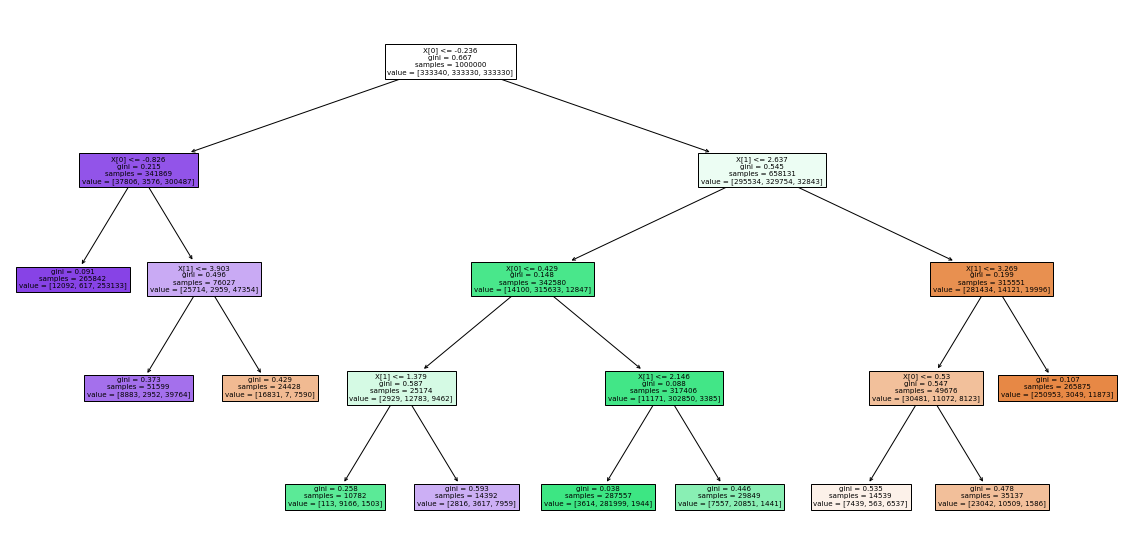

In [28]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.show()

In [29]:
clf.score(X, y)

0.911137